# Business Problem

---

Bank Rakyat Sejahtera (BRS) memiliki program pinjaman lunak bernama BRS Flexi. Dept kredit consumer BRS ingin mengotomatisasi proses pengambilan keputusan jalur kredit BRS Flexi ini. 

Untuk melakukannya, kami dipercaya membuat model ML untuk prediksi apakah seseorang dikategorikan BAD credit atau tidak

# Model Objective

---

Meminimalkan resiko perusahaan dalam memberikan pinjaman kepada pelanggan yang terindikasi BAD credit

# Goal Criteria

---

Membentuk model ML yg memiliki nilai precision >80% dan mengurangi indikasi total BAD credit

# Data Exploration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### >> Load Dataset

In [ ]:
df = pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
df.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


#### >> Melihat kondisi data

In [ ]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [ ]:
df.shape
print("Jumlah baris : ", df.shape[0])
print("Jumlah kolom : ", df.shape[1])

Jumlah baris :  5960
Jumlah kolom :  13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


Dari informasi di atas, didapatkan informasi bahwa:
* `BAD` merupakan target
* Dataframe memiliki total 5960 baris dan 13 kolom
* Dataframe masih memiliki *null* values di beberapa kolom 
* Terlalu banyak data kosong pada feature DEBTINC, sehingga untuk mengisi data kosong bisa menggunakan mice imputation

#### >> Membagi dataset menjadi tipe data numerical dan categorical

In [ ]:
numerical = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
categorical = ['REASON', 'JOB']

#### >> Statistika deskriptif

In [ ]:
df[numerical].describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [ ]:
df[categorical].describe()

,REASON,JOB
count,5708,5681
unique,2,6
top,DebtCon,Other
freq,3928,2388


#### >> Boxplot

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 17, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

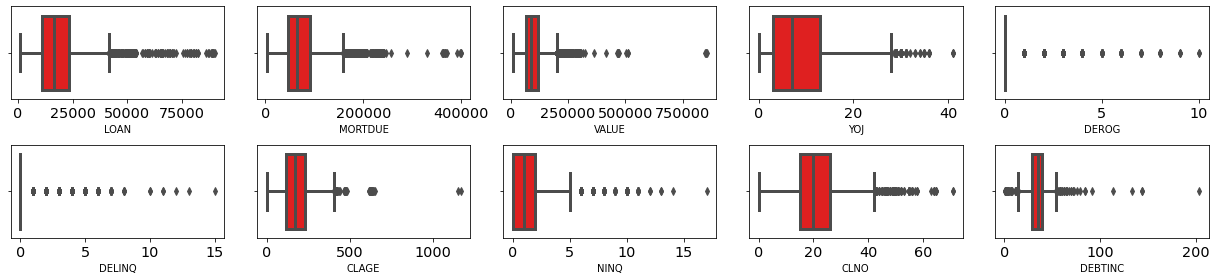

In [ ]:
for i in range(0, len(numerical)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[numerical[i]], color='red', orient='v')
    plt.tight_layout()

Dari boxplot di atas, terlihat bahwa :
* Hampir semua feature memiliki outlier
* Hampir semua distribusi bersifat *skewed*

#### >> Distribusi Plot

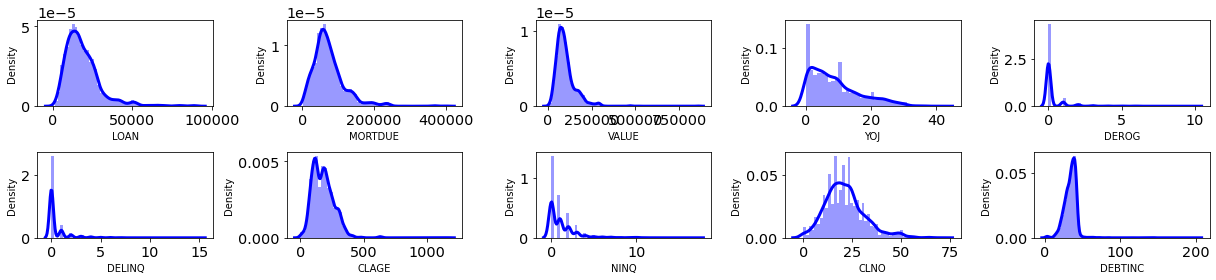

In [ ]:
plt.figure(figsize=(17, 4))
for i in range(0, len(numerical)):
    plt.subplot(2, 5, i+1)
    sns.distplot(df[numerical[i]], color='blue')
    plt.tight_layout()

Dari distribusi plot di atas, terlihat bahwa hampir semua distribusi bersifat *skewed*

#### >> Barplot

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 16, 10
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'large'
rcParams['ytick.labelsize'] = 'large'

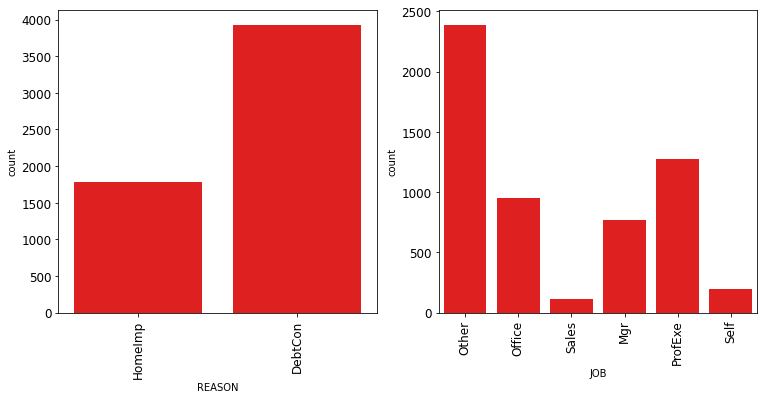

In [ ]:
for i in range(0, len(categorical)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[categorical[i]], color='red', orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout()

Dari barplot / countplot di atas, terlihat bahwa pada feature `JOB` didominasi oleh Other dan pada feature `REASON` didominasi oleh DebtCOn

# Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


### >> Missing Data

In [ ]:
missing = df.isna().sum()
missing

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

### >> Persentase Missing Data

In [ ]:
df.isna().mean()*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

#### >> Mengisi Nilai Kosong `DEBTINC` dengan MICE (Multiple Imputation with Chained Equations)

In [ ]:
!pip install impyute

In [ ]:
from impyute.imputation.cs import mice

In [ ]:
x = df[['BAD', 'DEBTINC']].to_numpy()
data = mice(x)
print(data)

[[ 1.         39.38764489]
 [ 1.         39.38764489]
 [ 1.         39.38764489]
 ...
 [ 0.         35.55659049]
 [ 0.         34.34088237]
 [ 0.         34.57151913]]


In [ ]:
debtinc = pd.DataFrame(data)
df['DEBTINC'] = debtinc[1]
df['DEBTINC']


0       39.387645
1       39.387645
2       39.387645
3       39.387645
4       33.253129
          ...    
5955    36.112347
5956    35.859971
5957    35.556590
5958    34.340882
5959    34.571519
Name: DEBTINC, Length: 5960, dtype: float64

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.387645
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129


### >>Mengisi data-data yang kosong/Imputation (Numeric) dengan mean atau median

##### Mencari nilai skew dari variable 'DEROG', 'DELINQ', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO'

In [ ]:
skew = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE', 'NINQ', 'CLNO']
df_skewness_value = df[skew].skew(axis = 0, skipna = True)
df_skewness_value

LOAN       2.023781
MORTDUE    1.814481
VALUE      3.053344
YOJ        0.988460
DEROG      5.320870
DELINQ     4.023150
CLAGE      1.343412
NINQ       2.621984
CLNO       0.775052
dtype: float64

#### Karena nilai skew dari variable `VALUE`, `DEROG`, `DELINQ` dan `NINQ` lebih dari 2.5, maka bentuk distribusi data adalah *skewed positif*. Sehingga untuk mengisi nilai kosong menggunakan median. Selain variable `VALUE`, `DEROG`, `DELINQ` dan `NINQ`, untuk mengisi nilai kosong menggunakan mean.

In [ ]:
import random

In [ ]:
def random_input(x):
  mean = df[x].mean()
  std = df[x].std()
  lower_limit = round(mean - std, 0)
  upper_limit = round(mean + std, 0)
  random_list = []
  for i in range(0, missing[x]):
    random_list.append(random.randint(lower_limit, upper_limit))

  random_list = np.array(random_list)

  list = df[x].values

  k = 0
  for i,j in enumerate(list):
    if np.isnan(list[i]):
      list[i] = random_list[k]
      k+=1

  df[x] = list

In [ ]:
for i in skew:
    if df_skewness_value[i] > 2.5:
        df[i].fillna(df[i].median(),inplace=True)
    elif df_skewness_value[i] < 2.5:
        random_input(i)

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
3,1,1500,53472.0,89235.5,NaN,NaN,6.0,0.0,0.0,121.000000,1.0,23.0,39.387645
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129


### >> Mengisi data-data yang kosong/Imputation (Categorical) menggunakan modus

In [ ]:
df['REASON'].fillna(df['REASON'].mode()[0], inplace=True)
df['JOB'].fillna(df['JOB'].mode()[0], inplace=True)


In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645
3,1,1500,53472.0,89235.5,DebtCon,Other,6.0,0.0,0.0,121.000000,1.0,23.0,39.387645
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129


### >> Mengecek apakah masih ada data yang kosong

In [ ]:
df.isna().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

### >> Menghapus Duplicated Data

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
print("Jumlah data ganda setelah dihapus:",df.duplicated().sum())

Jumlah data ganda setelah dihapus: 0


### >> Menghapus Outliers

In [ ]:
from scipy import stats

nums = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ','CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


#### * Metode Z-Score

In [ ]:
print('Jumlah baris sebelum memfilter outlier:', {len(df)})

filtered_entries = np.array([True] * len(df))
for col in nums:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore = df[filtered_entries]

print('Jumlah baris setelah memfilter outlier:', {len(df_zscore)})

Jumlah baris sebelum memfilter outlier: {5960}
Jumlah baris setelah memfilter outlier: {5246}


#### * Metode IQR

In [ ]:
print('Jumlah baris sebelum memfilter outlier:', {len(df)})

filtered_data = np.array([True] * len(df))
for col in nums:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  filtered_data = ((df[col] > low_limit) & (df[col] < high_limit))
  
df_IQR = df[filtered_data]

print('Jumlah baris setelah memfilter outlier:', {len(df_IQR)})


Jumlah baris sebelum memfilter outlier: {5960}
Jumlah baris setelah memfilter outlier: {5792}


### >> Boxplot sebelum dan sesudah memfilter outlier

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

#### Sebelum memfilter outlier

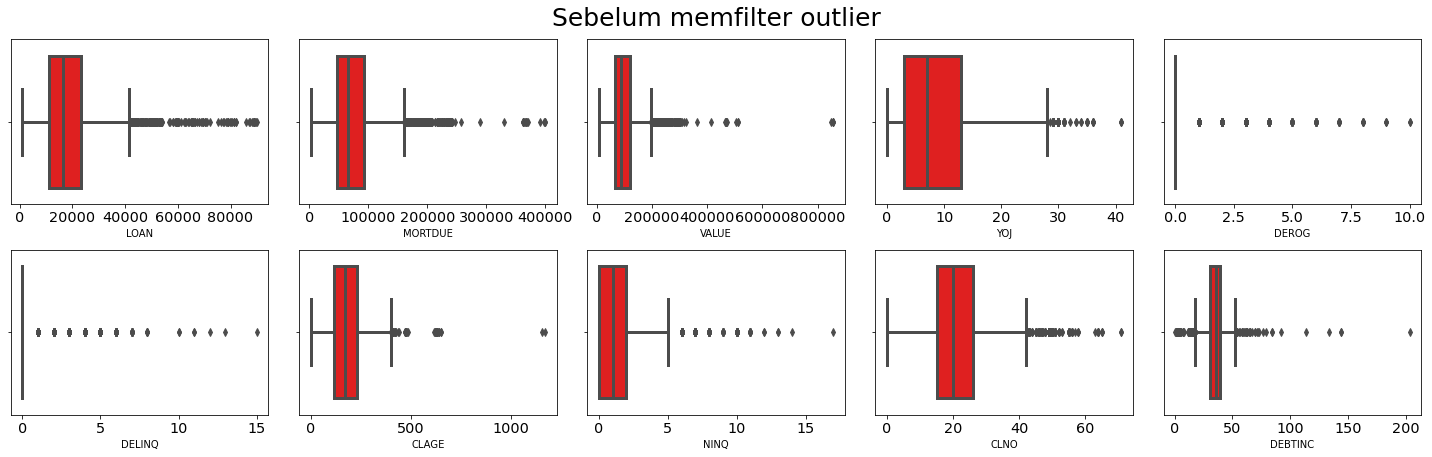

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df[nums[i]], color='red', orient='v')
    plt.suptitle('Sebelum memfilter outlier', y=1.05, fontsize=25)
    plt.tight_layout()


#### Setelah memfilter outlier menggunakan z-score

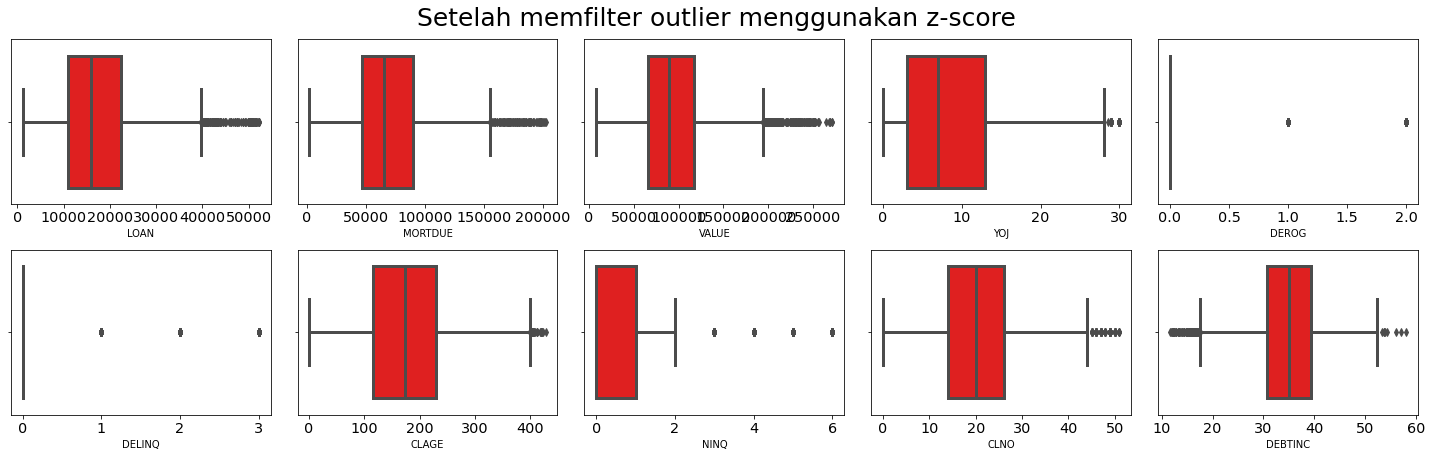

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df_zscore[nums[i]], color='red', orient='v')
    plt.suptitle('Setelah memfilter outlier menggunakan z-score', y=1.05, fontsize=25)
    plt.tight_layout()

#### Setelah memfilter outlier menggunakan IQR

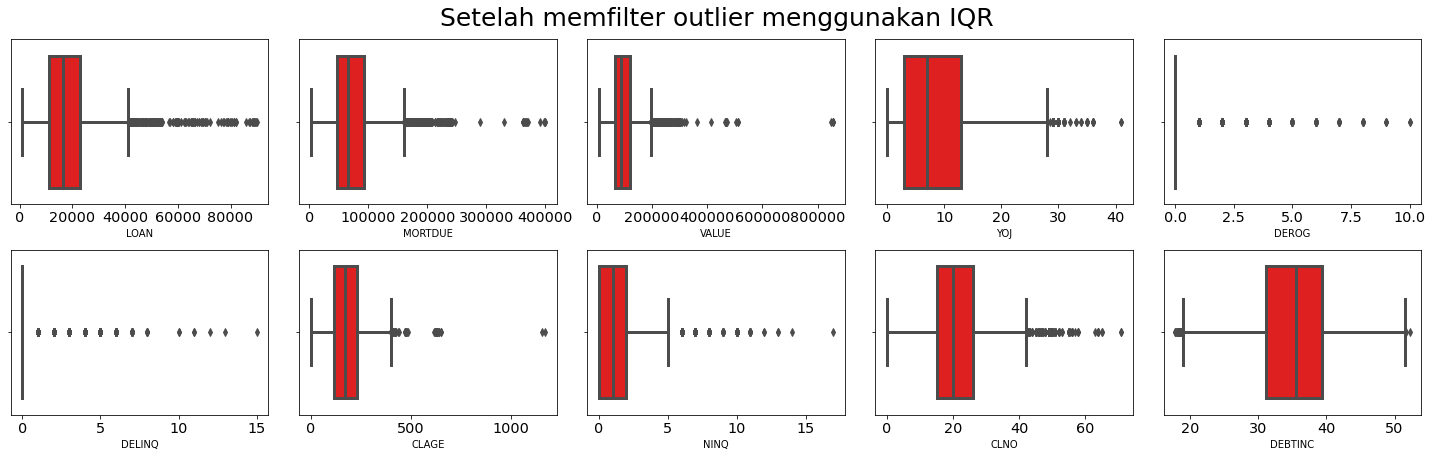

In [ ]:
for i in range(0, len(nums)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(df_IQR[nums[i]], color='red', orient='v')
    plt.suptitle('Setelah memfilter outlier menggunakan IQR', y=1.05, fontsize=25)
    plt.tight_layout()

Dari dua metode (z-score dan IQR) yang digunakan untuk memfilter outlier, dapat disimpulkan bahwa metode z-score memiliki hasil yang lebih baik karena memiliki distribusi yang cenderung lebih normal.

#### >> Pairplot

In [ ]:
df = df_zscore

<Figure size 1080x1080 with 0 Axes>

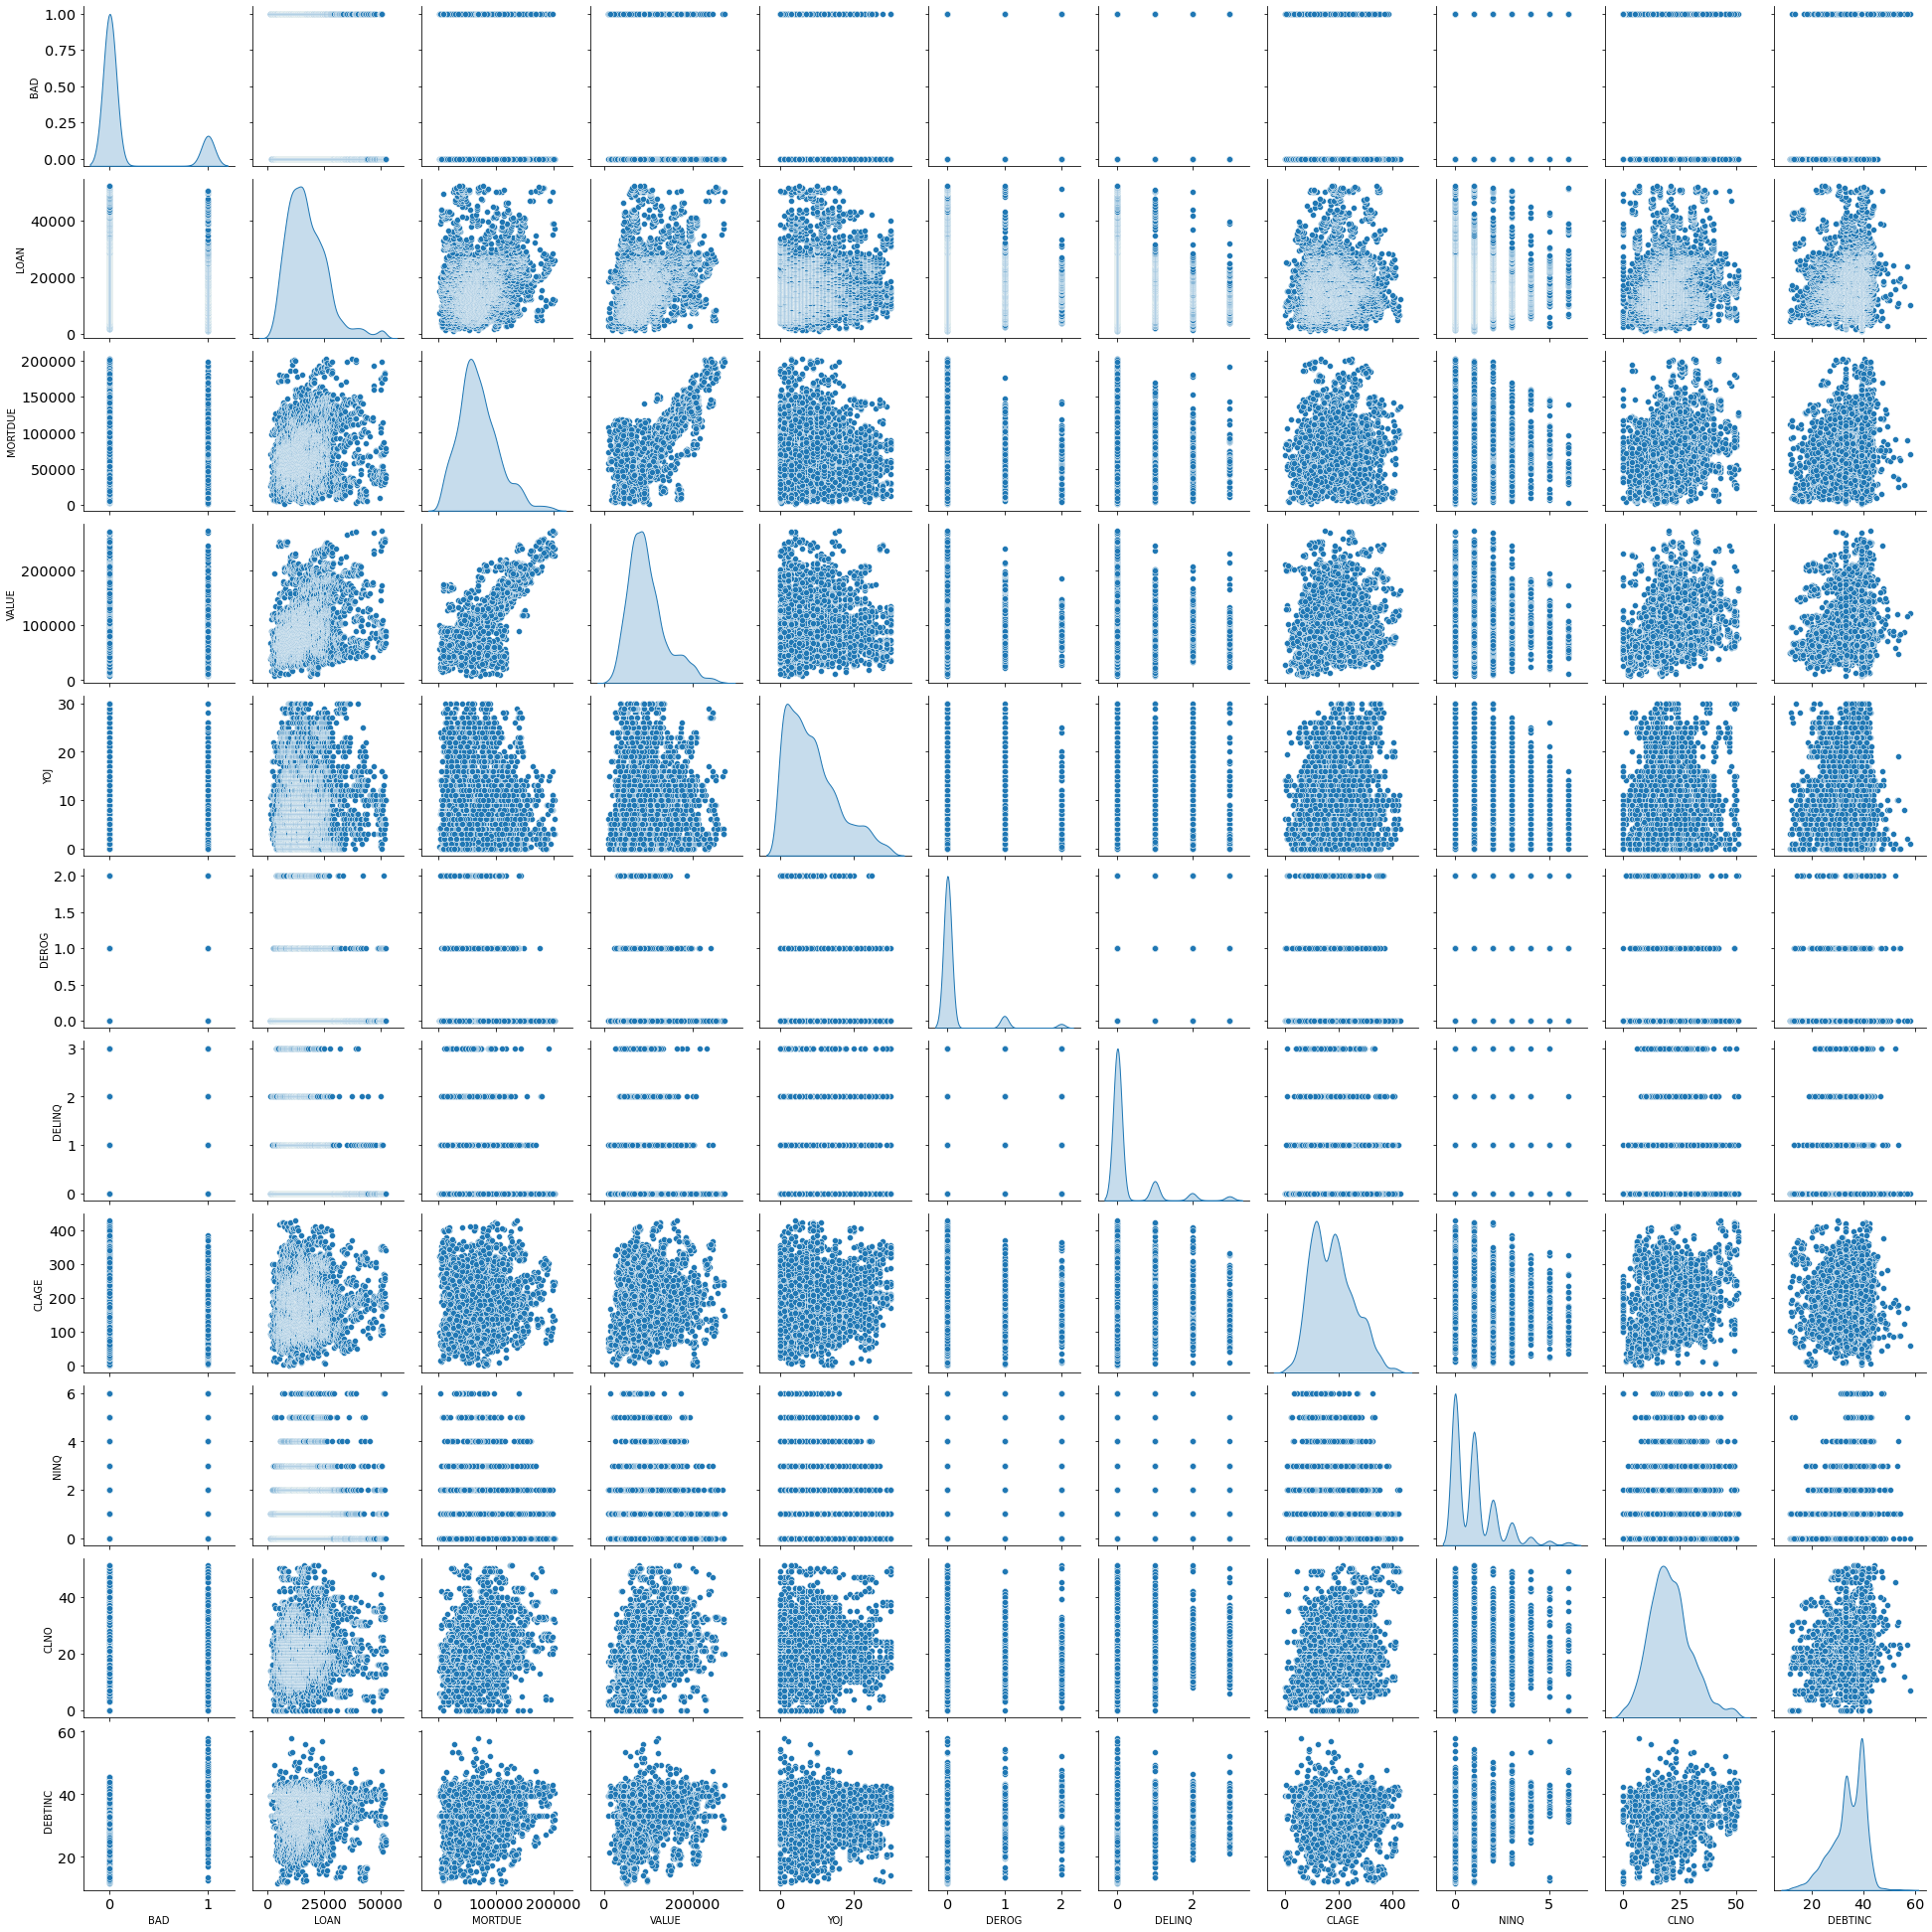

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')

Dari diagram pairplot di atas, dapat diketahui bahwa :
* Feature `MORTDUE` dan `VALUE` memiliki hubungan yang agak linear
* Target `BAD` memiliki imbalance data dimana value '0' sangat mendominasi dibandingkan value '1'

### >> Correlation heatmap

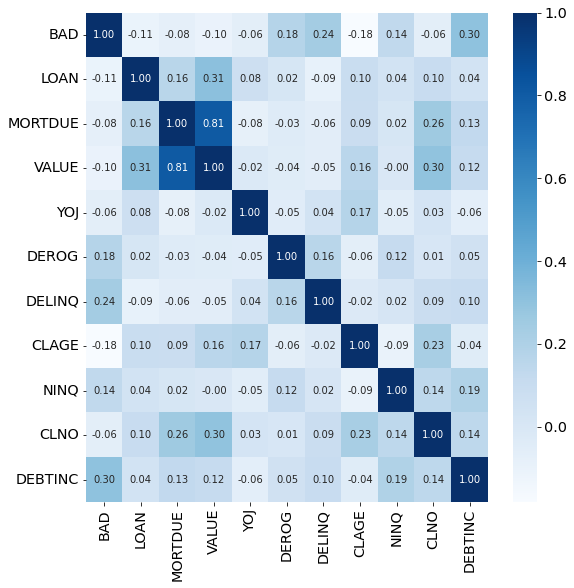

In [ ]:
plt.figure(figsize=(9, 9))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari correlation heatmap di atas dapat dilihat bahwa feature `DEBTINC`,`DELINQ` dan `DEROG` memiliki korelasi paling tinggi berturut-turut terhadap target (`BAD`) dibandingkan dengan feature yang lain

### >> Pie Chart Target `BAD`

In [ ]:
df.groupby('BAD')['BAD'].count()

BAD
0    4379
1     867
Name: BAD, dtype: int64

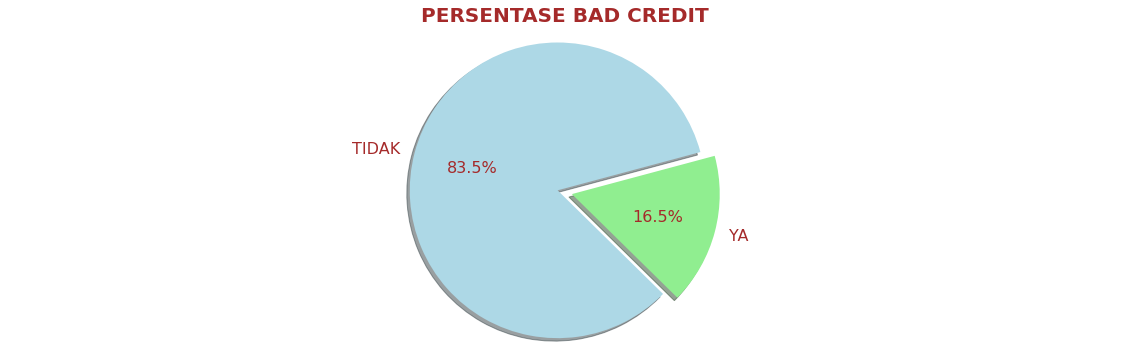

In [ ]:
Tasks = df.groupby('BAD').size()

my_labels = 'TIDAK','YA'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)
plt.pie(Tasks, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 16})
plt.axis('equal')
plt.title('PERSENTASE BAD CREDIT', fontsize=20, fontweight='bold', color='brown')
plt.show()

Dari Pie Chart di atas dapat diketahui bahwa persentase yang tidak bad credit (83%) jauh lebih besar daripada yang bad credit (16.5%)

### >> Melihat pengaruh feature `REASON` terhadap Target `BAD`

In [ ]:
df.groupby(['BAD', 'REASON'])['REASON'].count()


BAD  REASON 
0    DebtCon    3124
     HomeImp    1255
1    DebtCon     566
     HomeImp     301
Name: REASON, dtype: int64

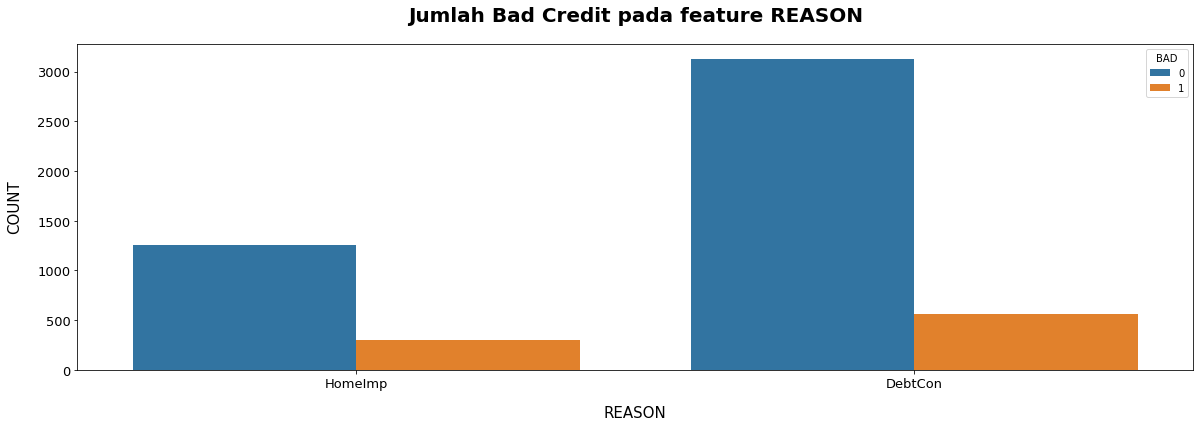

In [ ]:
sns.countplot(x = 'REASON', hue = 'BAD', data = df)
plt.xlabel('REASON', size=15, labelpad=15)
plt.ylabel('COUNT', size=15, labelpad=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Jumlah Bad Credit pada feature REASON', size=20, y=1.05, fontweight='bold')

plt.show()

In [ ]:
dfa = df.loc[df['REASON']=='HomeImp',['REASON','BAD']]
df_home = dfa.groupby('BAD')

dfb = df.loc[df['REASON']=='DebtCon',['REASON','BAD']]
df_debt = dfb.groupby('BAD')


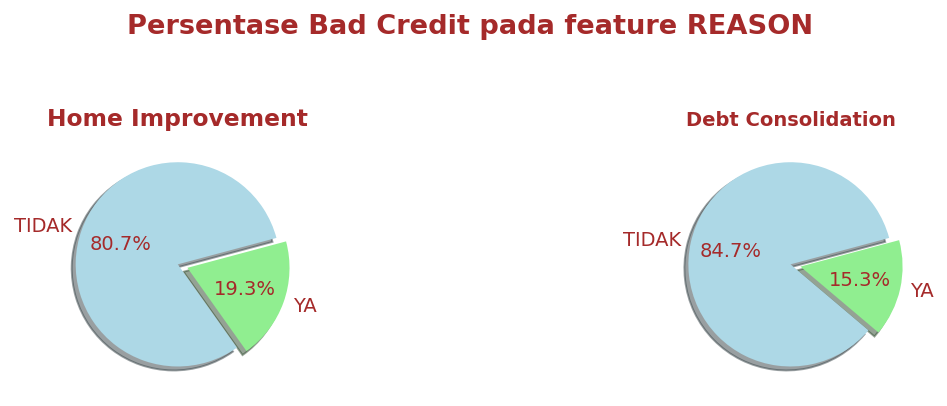

In [ ]:
fig = plt.figure(figsize=(8,3),dpi=140)

my_labels = 'TIDAK','YA'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)

ax1 = fig.add_subplot(131)
pic = df_home.BAD.value_counts().to_frame()
ax1.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Home Improvement', fontsize=12, fontweight='bold', color='brown')

ax2 = fig.add_subplot(133)
pic = df_debt.BAD.value_counts().to_frame()
ax2.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Debt Consolidation', fontsize=10, fontweight='bold', color='brown')

plt.suptitle('Persentase Bad Credit pada feature REASON', y=1.10, fontsize=14, fontweight='bold', color ='brown')
plt.show()

### >> Bad Credit Debt Consolidation VS Home Improvement

In [ ]:
dfx = df.loc[df['BAD']==1,['BAD','REASON']]
df_reason= dfx.groupby('REASON').size()


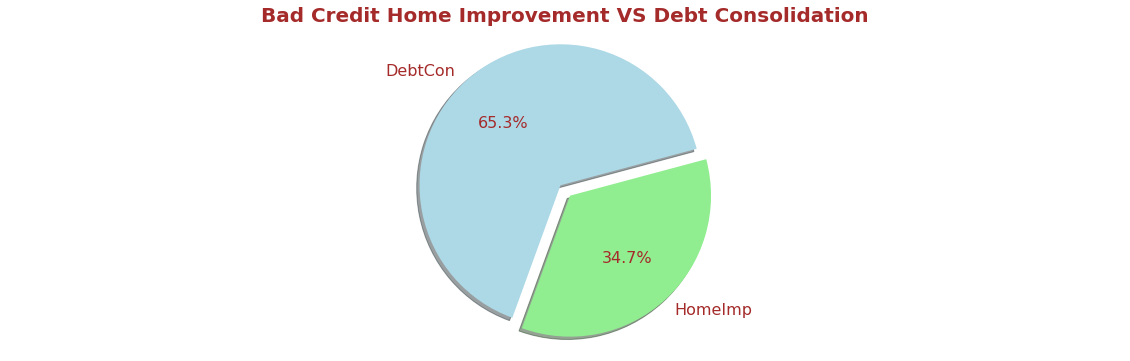

In [ ]:
my_labels = 'DebtCon','HomeImp'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)
plt.pie(df_reason, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 16})
plt.axis('equal')
plt.title('Bad Credit Home Improvement VS Debt Consolidation', fontsize=20, fontweight='bold', color='brown')
plt.show()

#### Kesimpulan:
* Jumlah 'Home Improvement' yang bad credit (301 atau 19.3%) lebih sedikit daripada yang good credit (1255 atau 80.7%)
* Demikian juga dengan 'Debt Consolidation', jumlah bad credit (566 atau 15.3%) lebih sedikit  daripada yang good credit (3124 atau 84.7%)
* Jumlah bad credit Debt Consolidation (566 atau 65.3%) lebih besar daripada jumlah bad credit pada Home Improvement (301 atau 34.7%)

### >> Melihat pengaruh feature `JOB` terhadap Target `BAD`

In [ ]:
bad_reason = df.groupby(['BAD', 'JOB'])['JOB'].count()
bad_reason

BAD  JOB    
0    Mgr         530
     Office      777
     Other      1913
     ProfExe     981
     Sales        71
     Self        107
1    Mgr         125
     Office       93
     Other       450
     ProfExe     134
     Sales        29
     Self         36
Name: JOB, dtype: int64

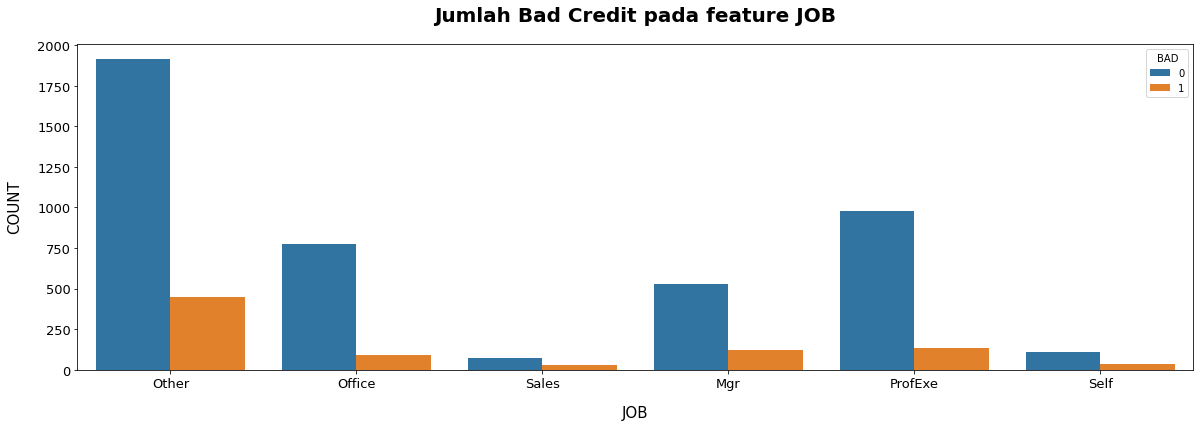

In [ ]:
sns.countplot(x = 'JOB', hue = 'BAD', data = df)
plt.xlabel('JOB', size=15, labelpad=15)
plt.ylabel('COUNT', size=15, labelpad=15)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=13)

plt.title('Jumlah Bad Credit pada feature JOB', size=20, y=1.05, fontweight='bold')

plt.show()

In [ ]:
df1 = df.loc[df['JOB']=='Mgr',['JOB','BAD']]
df_mgr = df1.groupby('BAD')

df2 = df.loc[df['JOB']=='Office',['JOB','BAD']]
df_office = df2.groupby('BAD')

df3 = df.loc[df['JOB']=='Other',['JOB','BAD']]
df_other = df3.groupby('BAD')

df4 = df.loc[df['JOB']=='ProfExe',['JOB','BAD']]
df_prof = df4.groupby('BAD')

df5 = df.loc[df['JOB']=='Sales',['JOB','BAD']]
df_sales = df5.groupby('BAD')

df6 = df.loc[df['JOB']=='Self',['JOB','BAD']]
df_self = df6.groupby('BAD')

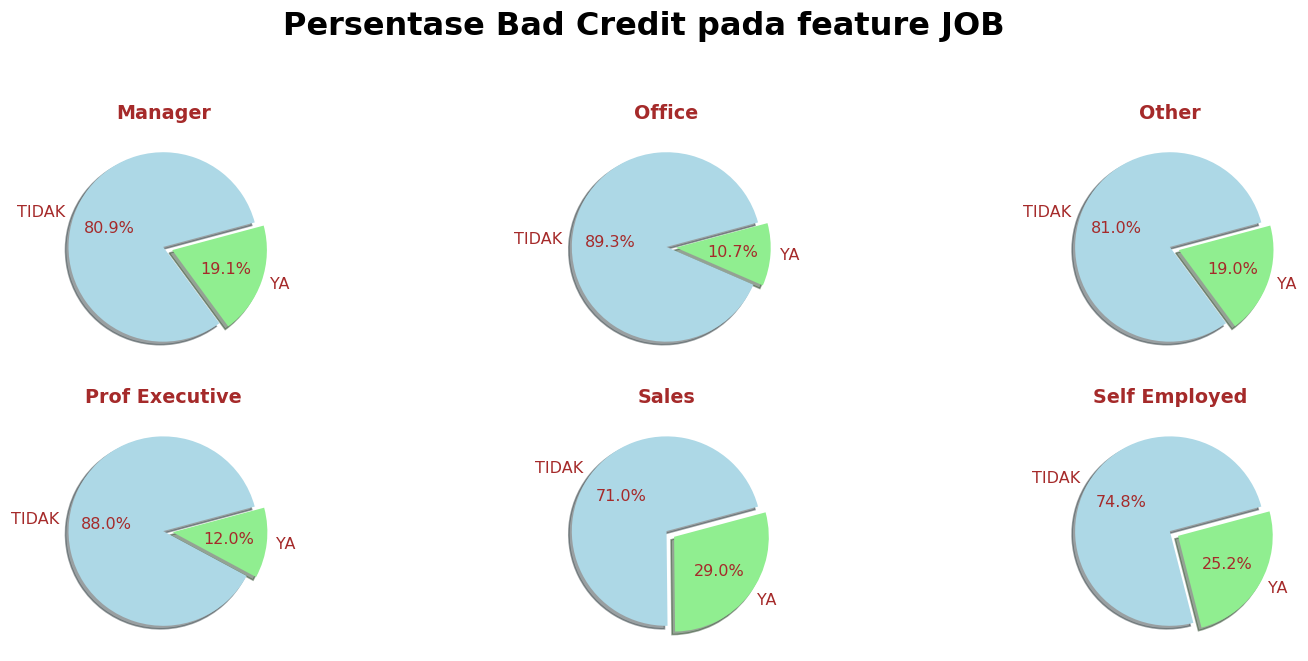

In [ ]:
fig = plt.figure(figsize=(16,6),dpi=115)

my_labels = 'TIDAK','YA'
my_colors = ['lightblue','lightgreen']
my_explode = (0, 0.1)

ax1 = fig.add_subplot(231)
pic = df_mgr.BAD.value_counts().to_frame()
ax1.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Manager', fontsize=12, fontweight='bold', color='brown')

ax2 = fig.add_subplot(232)
pic = df_office.BAD.value_counts().to_frame()
ax2.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Office', fontsize=12, fontweight='bold', color='brown')

ax3 = fig.add_subplot(233)
pic = df_other.BAD.value_counts().to_frame()
ax3.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Other', fontsize=12, fontweight='bold', color='brown')

ax4 = fig.add_subplot(234)
pic = df_prof.BAD.value_counts().to_frame()
ax4.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Prof Executive', fontsize=12, fontweight='bold', color='brown')

ax5 = fig.add_subplot(235)
pic = df_sales.BAD.value_counts().to_frame()
ax5.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Sales', fontsize=12, fontweight='bold', color='brown')

ax6 = fig.add_subplot(236)
pic = df_self.BAD.value_counts().to_frame()
ax6.pie(pic.BAD, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 10})
plt.title('Self Employed', fontsize=12, fontweight='bold', color='brown')

plt.suptitle('Persentase Bad Credit pada feature JOB', y=1.05, fontsize=20, fontweight='bold')
plt.show()

### >> Bad Credit pada masing-masing Job

In [ ]:
dfy = df.loc[df['BAD']==1,['BAD','JOB']]
df_job= dfy.groupby('JOB').size()
df_job

JOB
Mgr        125
Office      93
Other      450
ProfExe    134
Sales       29
Self        36
dtype: int64

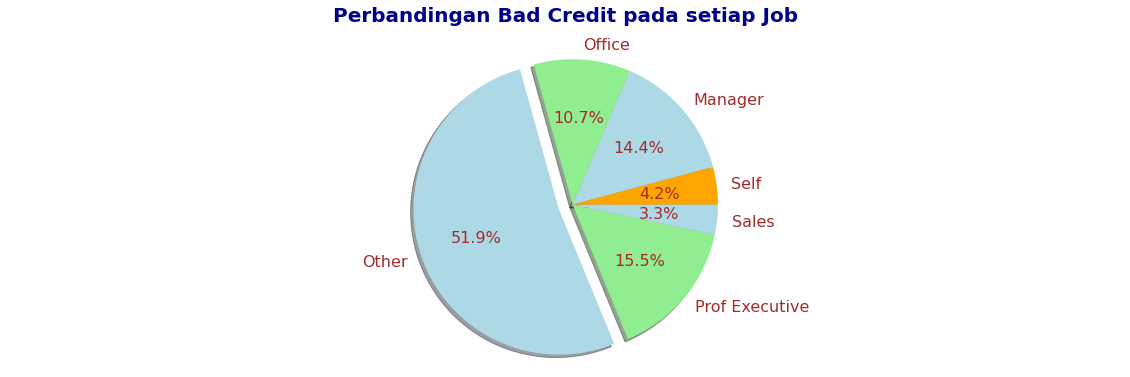

In [ ]:
my_labels = 'Manager','Office','Other','Prof Executive','Sales','Self'
my_colors = ['lightblue','lightgreen','lightblue','lightgreen', 'lightblue', 'orange']
my_explode = (0, 0, 0.1, 0, 0, 0)
plt.pie(df_job, labels=my_labels, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode,  textprops={'color':"brown", 'fontsize' : 16})
plt.axis('equal')
plt.title('Perbandingan Bad Credit pada setiap Job', fontsize=20, fontweight='bold', color='darkblue',  y=1.05)
plt.show()

#### Kesimpulan:
* Pada feature `JOB`, semua jenis pekerjaan memiliki jumlah bad credit yang lebih kecil daripada good credit.
* Jenis pekerjaan `Other` memiliki jumlah bad credit (450 atau 51.9%) yang paling besar daripada jenis pekerjaan yang lain.
* Sedangkan jenis pekerjaan `Sales` memiliki jumlah bad credit (29 atau 3.3%) yang paling kecil daripada jenis pekerjaan yang lain.

### >> Featue Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df['REASON_CODE'] = LabelEncoder().fit_transform(df['REASON'])
df['JOB_CODE'] = LabelEncoder().fit_transform(df['JOB'])

df = df.drop(columns=['REASON', 'JOB'])



In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_CODE,JOB_CODE
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,39.387645,1,2
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,39.387645,1,2
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,39.387645,1,2
3,1,1500,53472.0,89235.5,6.0,0.0,0.0,121.000000,1.0,23.0,39.387645,0,2
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,33.253129,1,1


### >> Feature Selection

In [ ]:
from scipy.stats import f_oneway
from sklearn.feature_selection import chi2

In [ ]:
num = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
cat = ['REASON_CODE', 'JOB_CODE']

#### ANOVA TEST

Mendefinisikan null hypothesis dan alternate hypothesis untuk feature numerical.
* H₀ (Null Hypothesis) — bahwa antara feature dan target adalah independen (tidak ada korelasi)
* H₁ (Alternate Hypothesis) — bahwa antara feature dan target adalah dependen (memiliki korelasi)
* Menerima Null hypothesis jika P-value > 0.05
* Menolak Null hypothesis jika P-value < 0.05
* P-value : probabilitas bahwa jika Null Hypothesis itu benar
* alpha = 0.05

In [ ]:
for x in num:
  GroupLists=df.groupby(x)['BAD'].apply(list)
  AnovaResults = f_oneway(*GroupLists)
  print(x, 'P-Value adalah ', AnovaResults[1])

LOAN P-Value adalah  1.1194321368929706e-42
MORTDUE P-Value adalah  0.9999999999994522
VALUE P-Value adalah  0.9999999999288234
YOJ P-Value adalah  3.2096937823582636e-53
DEROG P-Value adalah  1.8829844351128885e-37
DELINQ P-Value adalah  1.1234556712839042e-70
CLAGE P-Value adalah  0.9999999999911924
NINQ P-Value adalah  5.0829742001550726e-21
CLNO P-Value adalah  2.036953316599608e-27
DEBTINC P-Value adalah  0.0


Dari hasil Anova test di atas, dapat diketahui bahwa :
* nilai P-value untuk feature `MORTDUE`, `VALUE`, dan `CLAGE` lebih besar dari 0.05, sehingga feature-feature tersebut tidak memiliki korelasi dengan target (menerima Null Hypothesis)
* nilai P-value untuk selain feature `MORTDUE`, `VALUE`, dan `CLAGE` lebih kecil dari 0.05, sehingga feature-feature tersebut memiliki korelasi dengan target (menolak Null Hypothesis)

#### CHI-SQUARE TEST

Mendefinisikan null hypothesis dan alternate hypothesis untuk feature categorical.
* H₀ (Null Hypothesis) — bahwa antara feature dan target adalah independen (tidak ada korelasi)
* H₁ (Alternate Hypothesis) — bahwa antara feature dan target adalah dependen (memiliki korelasi)
* Menerima Null hypothesis jika P-value > 0.05
* Menolak Null hypothesis jika P-value < 0.05
* P-value : probabilitas bahwa jika Null Hypothesis itu benar
* alpha = 0.05

In [ ]:
X = df[cat]
y = df['BAD']

chi_scores = chi2(X,y)
chi_score = chi_scores[1]

print('REASON P-value adalah :', chi_score[0])
print('JOB P-value adalah :', chi_score[1])




REASON P-value adalah : 0.002768243064120451
JOB P-value adalah : 0.43530884811743054


Dari hasil Chi-square test di atas, dapat diketahui bahwa :
* nilai P-value untuk feature `REASON` lebih kecil dari 0.05, sehingga feature tersebut memiliki korelasi dengan target (menolak Null Hypothesis)
* nilai P-value untuk feature `JOB` lebih besar dari 0.05, sehingga feature tersebut tidak memiliki korelasi dengan target (menerima Null Hypothesis)


In [ ]:
df = df.drop(columns=['MORTDUE', 'VALUE', 'CLAGE', 'JOB_CODE'])
df.head()

,BAD,LOAN,YOJ,DEROG,DELINQ,NINQ,CLNO,DEBTINC,REASON_CODE
0,1,1100,10.5,0.0,0.0,1.0,9.0,39.387645,1
1,1,1300,7.0,0.0,2.0,0.0,14.0,39.387645,1
2,1,1500,4.0,0.0,0.0,1.0,10.0,39.387645,1
3,1,1500,6.0,0.0,0.0,1.0,23.0,39.387645,0
4,0,1700,3.0,0.0,0.0,0.0,14.0,33.253129,1


In [ ]:
df_1 = df

### >> Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('BAD', axis=1)
y = df['BAD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


### >> Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train= ss.fit_transform(X_train)
X_test= ss.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
X_train.head()

,LOAN,YOJ,DEROG,DELINQ,NINQ,CLNO,DEBTINC,REASON_CODE
0,-0.473350,-0.520262,-0.301389,-0.391616,0.009690,-0.841280,-0.066312,-0.648886
1,-1.380286,-0.238450,-0.301389,-0.391616,-0.817809,-1.057375,1.345434,1.541104
2,-0.031219,-1.224792,-0.301389,-0.391616,-0.817809,-0.517138,-1.164325,-0.648886
3,-0.450677,-0.942980,-0.301389,-0.391616,0.009690,-1.921753,1.234823,-0.648886
4,0.206851,-1.083886,-0.301389,-0.391616,2.492189,-0.192996,-0.177803,-0.648886


### >> Handling Imbalanced Dataset 

In [ ]:
pd.Series(y_train).value_counts()

0    3063
1     609
Name: BAD, dtype: int64

#### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_under).value_counts()

0    609
1    609
Name: BAD, dtype: int64

#### Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
pd.Series(y_over).value_counts()

0    3063
1    3063
Name: BAD, dtype: int64

# **Modelling**

In [ ]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 7
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
from sklearn import datasets

In [ ]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1)
    print("AUC: %.2f" % auc(fpr, tpr))

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

### A. Logistic Regression

#### >> Menggunakan Undersampling

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=42)
logistic.fit(X_under, y_under)

lr_pred = logistic.predict(X_test)

eval_classification(logistic,lr_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.7313
Precision (Test Set): 0.3570
Recall (Test Set): 0.7984
F1-Score (Test Set): 0.4934
AUC: 0.76


#### >> Menggunakan Oversampling

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(random_state=42)
logistic.fit(X_over, y_over)

lr_pred = logistic.predict(X_test)

eval_classification(logistic,lr_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.7332
Precision (Test Set): 0.3608
Recall (Test Set): 0.8140
F1-Score (Test Set): 0.5000
AUC: 0.77


Jadi data resampling yg terbaik untuk logistic regression adalah menggunakan metode oversampling

#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(logistic.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(logistic.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(logistic.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(logistic.score(X_test, y_test)))


Training set Oversampling score: 0.7651
Test set Oversampling score: 0.7332
Training set Undersampling score: 0.7603
Test set Undersampling score: 0.7332


#### >> Feature Importance



In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

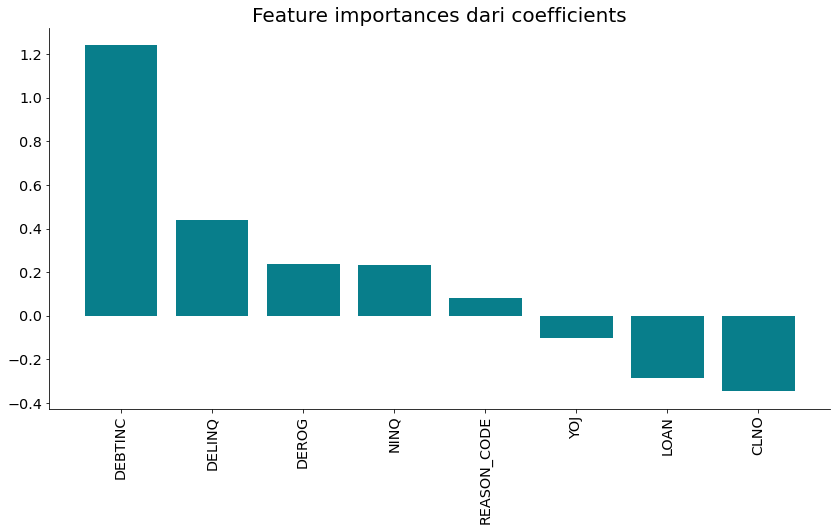

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

#### >> Model Logistic Regression Setelah mengabaikan feature-feature bernilai negatif

In [ ]:
X1 = df_1.drop(['YOJ','LOAN','CLNO','BAD'], axis=1)
y1 = df_1['BAD']
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=12)


In [ ]:
ss = StandardScaler()
X1_train= ss.fit_transform(X1_train)
X1_test= ss.transform(X1_test)

In [ ]:
X1_train = pd.DataFrame(X1_train, columns=X1.columns)
X1_test = pd.DataFrame(X1_test, columns=X1.columns)
X1_train.head()

,DEROG,DELINQ,NINQ,DEBTINC,REASON_CODE
0,2.217277,-0.401315,-0.001794,0.858446,-0.656522
1,-0.304197,-0.401315,-0.001794,-0.152641,-0.656522
2,-0.304197,-0.401315,0.821458,0.803735,1.523178
3,-0.304197,-0.401315,-0.001794,-0.974771,1.523178
4,2.217277,-0.401315,-0.825045,0.352622,-0.656522


#### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X1_under, y1_under = undersample.fit_resample(X1_train, y1_train)

In [ ]:
pd.Series(y1_under).value_counts()

0    632
1    632
Name: BAD, dtype: int64

#### Oversampling (SMOTE)

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1_over, y1_over = oversample.fit_resample(X1_train, y1_train)

In [ ]:
pd.Series(y1_over).value_counts()

0    3040
1    3040
Name: BAD, dtype: int64

#### >> Menggunakan Undersampling

In [ ]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X1_under, y1_under)

lr_pred = logistic.predict(X1_test)

eval_classification(logistic,lr_pred,X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.7382
Precision (Test Set): 0.3434
Recall (Test Set): 0.8255
F1-Score (Test Set): 0.4850
AUC: 0.77


#### >> Menggunakan Oversampling

In [ ]:
logistic = LogisticRegression(random_state=42)
logistic.fit(X1_over, y1_over)

lr_pred = logistic.predict(X1_test)

eval_classification(logistic,lr_pred,X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.7300
Precision (Test Set): 0.3422
Recall (Test Set): 0.8766
F1-Score (Test Set): 0.4922
AUC: 0.79


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(logistic.score(X1_over, y1_over)))
print('Test set Oversampling score: {:.4f}'.format(logistic.score(X1_test, y1_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(logistic.score(X1_under, y1_under)))
print('Test set Undersampling score: {:.4f}'.format(logistic.score(X1_test, y1_test)))


Training set Oversampling score: 0.7711
Test set Oversampling score: 0.7300
Training set Undersampling score: 0.7714
Test set Undersampling score: 0.7300


Dari pemodelan-pemodelan di atas, dapat disimpulkan bahwa pengabaian feature yang bernilai negatif pada feature importance menghasilkan akurasi yang lebih buruk daripada tanpa pengabaian feature

### B. Decision Tree

#### >> Menggunakan Undersampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_under, y_under)

y_pred = tree.predict(X_test)
eval_classification(tree, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.8158
Precision (Test Set): 0.4657
Recall (Test Set): 0.8411
F1-Score (Test Set): 0.5994
AUC: 0.83


#### >> Menggunakan Oversampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_over, y_over)

y_pred = tree.predict(X_test)
eval_classification(tree, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.9053
Precision (Test Set): 0.6719
Recall (Test Set): 0.8256
F1-Score (Test Set): 0.7409
AUC: 0.87


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(tree.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(tree.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(tree.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(tree.score(X_test, y_test)))


Training set Oversampling score: 1.0000
Test set Oversampling score: 0.9053
Training set Undersampling score: 1.0000
Test set Undersampling score: 0.9053


#### >> Feature Importance

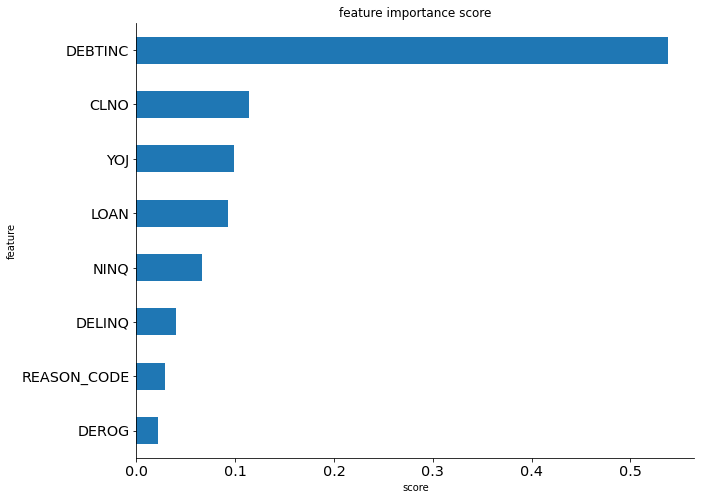

In [ ]:
show_feature_importance(tree)

### C. Random Forest

#### >> Menggunakan Undersampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=12)
rf.fit(X_under, y_under)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.9136
Precision (Test Set): 0.7047
Recall (Test Set): 0.8140
F1-Score (Test Set): 0.7554
AUC: 0.87


#### >> Menggunakan Oversampling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=12)
rf.fit(X_over, y_over)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.9365
Precision (Test Set): 0.8292
Recall (Test Set): 0.7713
F1-Score (Test Set): 0.7992
AUC: 0.87


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(rf.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(rf.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(rf.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(rf.score(X_test, y_test)))


Training set Oversampling score: 1.0000
Test set Oversampling score: 0.9365
Training set Undersampling score: 1.0000
Test set Undersampling score: 0.9365


#### >> Feature Importance

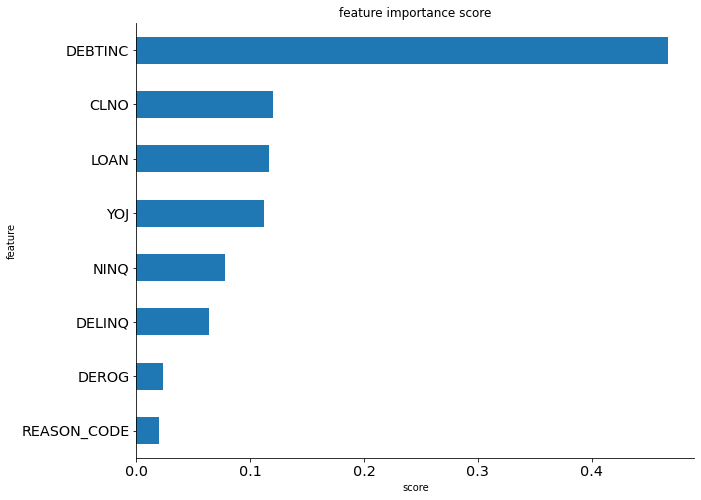

In [ ]:
show_feature_importance(rf)

### D. SVM

#### >> Menggunakan Undersampling

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_under, y_under)

y_pred = svm.predict(X_test)
eval_classification(svm, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.7624
Precision (Test Set): 0.3934
Recall (Test Set): 0.8295
F1-Score (Test Set): 0.5337
AUC: 0.79


#### >> Menggunakan Oversampling

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_over, y_over)

y_pred = svm.predict(X_test)
eval_classification(svm, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.7884
Precision (Test Set): 0.4239
Recall (Test Set): 0.8101
F1-Score (Test Set): 0.5566
AUC: 0.80


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(svm.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(svm.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(svm.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(svm.score(X_test, y_test)))


Training set Oversampling score: 0.8426
Test set Oversampling score: 0.7884
Training set Undersampling score: 0.8374
Test set Undersampling score: 0.7884


#### >> Feature Importance

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

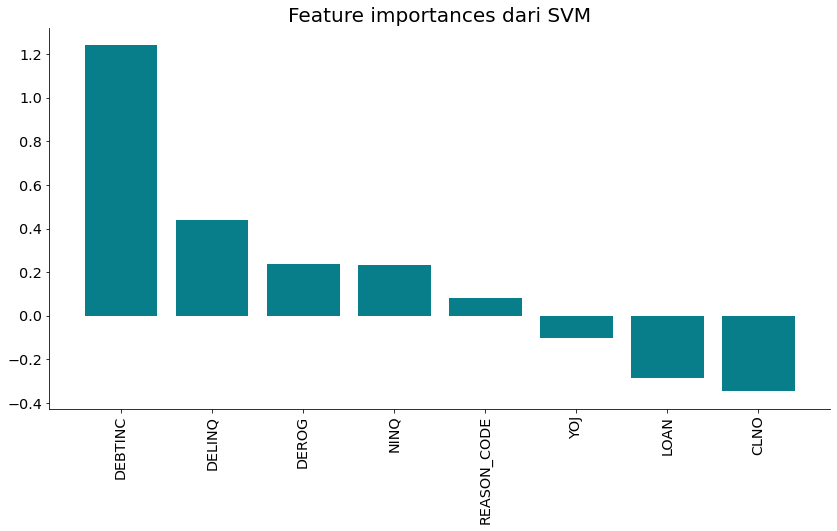

In [ ]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances dari SVM', size=20)
plt.xticks(rotation='vertical')
plt.show()

### E. LightGBM

#### >> Menggunakan Undersampling

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_under, y_under)

y_pred = lgbm.predict(X_test)
eval_classification(lgbm, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.9085
Precision (Test Set): 0.6863
Recall (Test Set): 0.8140
F1-Score (Test Set): 0.7447
AUC: 0.87


#### >> Menggunakan Oversampling

In [ ]:
import lightgbm as lgb

lgbm = lgb.LGBMClassifier()
lgbm.fit(X_over, y_over)

y_pred = lgbm.predict(X_test)
eval_classification(lgbm, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.9511
Precision (Test Set): 0.9249
Recall (Test Set): 0.7636
F1-Score (Test Set): 0.8365
AUC: 0.88


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(lgbm.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(lgbm.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(lgbm.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(lgbm.score(X_test, y_test)))


Training set Oversampling score: 0.9879
Test set Oversampling score: 0.9511
Training set Undersampling score: 0.9524
Test set Undersampling score: 0.9511


#### >> Feature Importance

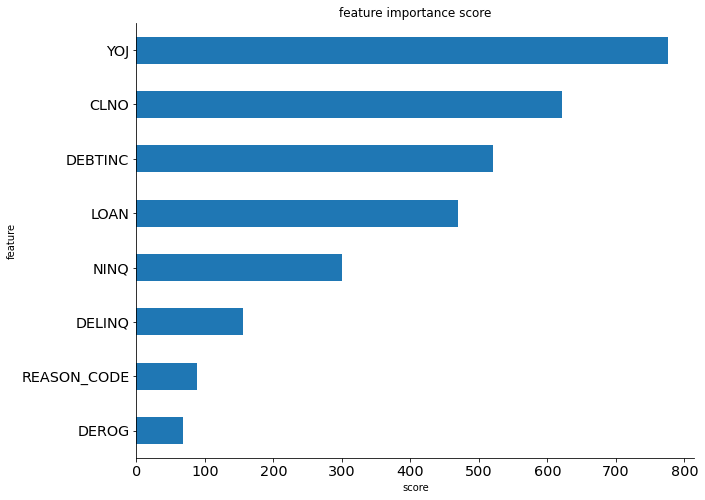

In [ ]:
show_feature_importance(lgbm)

### F. XGBoost

#### >> Menggunakan Undersampling

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_under, y_under)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.9257
Precision (Test Set): 0.7722
Recall (Test Set): 0.7752
F1-Score (Test Set): 0.7737
AUC: 0.87


#### >> Menggunakan Oversampling

In [ ]:
xg = XGBClassifier()
xg.fit(X_over, y_over)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.9193
Precision (Test Set): 0.7569
Recall (Test Set): 0.7481
F1-Score (Test Set): 0.7524
AUC: 0.85


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(xg.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(xg.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(xg.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(xg.score(X_test, y_test)))


Training set Oversampling score: 0.9244
Test set Oversampling score: 0.9193
Training set Undersampling score: 0.8834
Test set Undersampling score: 0.9193


#### >> Feature Importance

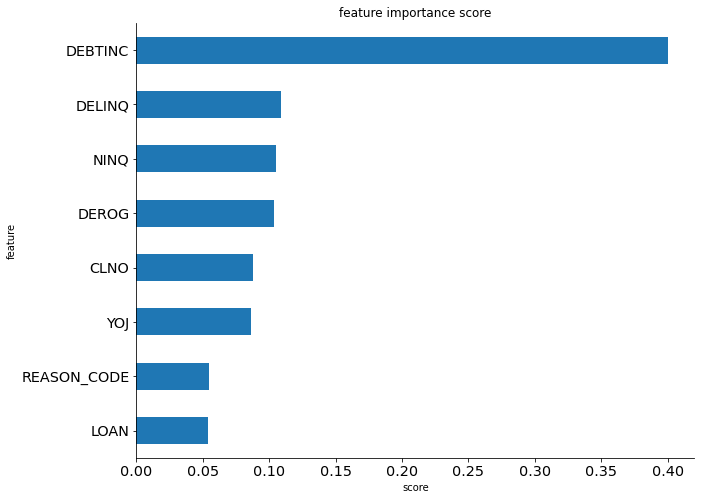

In [ ]:
show_feature_importance(xg)

### G. ADABoost

#### >> Menggunakan Undersampling

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_under, y_under)

y_pred = ada.predict(X_test)
eval_classification(ada, y_pred,X_under, y_under, X_test, y_test)

Accuracy (Test Set): 0.9034
Precision (Test Set): 0.6732
Recall (Test Set): 0.7984
F1-Score (Test Set): 0.7305
AUC: 0.86


#### >> Menggunakan Oversampling

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_over, y_over)

y_pred = ada.predict(X_test)
eval_classification(ada, y_pred,X_over, y_over, X_test, y_test)

Accuracy (Test Set): 0.8888
Precision (Test Set): 0.6343
Recall (Test Set): 0.7597
F1-Score (Test Set): 0.6914
AUC: 0.84


#### >> Cek Overfitting

In [ ]:
print('Training set Oversampling score: {:.4f}'.format(ada.score(X_over, y_over)))
print('Test set Oversampling score: {:.4f}'.format(ada.score(X_test, y_test)))
print("====================================")
print('Training set Undersampling score: {:.4f}'.format(ada.score(X_under, y_under)))
print('Test set Undersampling score: {:.4f}'.format(ada.score(X_test, y_test)))


Training set Oversampling score: 0.8675
Test set Oversampling score: 0.8888
Training set Undersampling score: 0.8645
Test set Undersampling score: 0.8888


#### >> Feature Importance

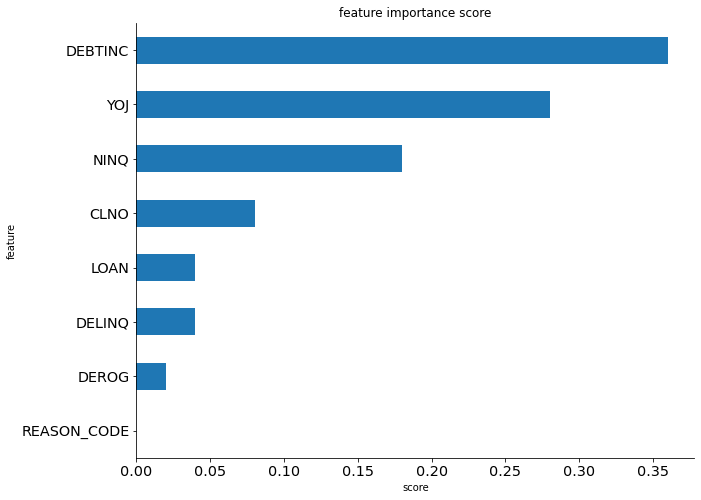

In [ ]:
show_feature_importance(ada)

#### >> Mencari score dari beberapa model

In [ ]:
from sklearn.model_selection import train_test_split
import sklearn as sk
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=2)

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
y_pred_LR = LR.predict(x_test)
print("Score Logistic Regression =", round(LR.score(x_test,y_test), 4))

SVM = svm.SVC(decision_function_shape="ovr").fit(x_train, y_train)
y_pred_SVM = SVM.predict(x_test)
print("Score SVM =", round(SVM.score(x_test, y_test), 4))

RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train)
y_pred_RF = RF.predict(x_test)
print("Score Random Forest =", round(RF.score(x_test, y_test), 4))

# instantiate the DecisionTreeClassifier and fit model with criterion gini index
DTC_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0).fit(x_train, y_train)
y_pred_DTC_gini = DTC_gini.predict(x_test)
print("Score DecisionTreeClassifier model with criterion gini index =", round(DTC_gini.score(x_test, y_test), 4))

# instantiate the DecisionTreeClassifier and fit model with criterion entropy
DTC_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0).fit(x_train, y_train)
y_pred_DTC_en = DTC_entropy.predict(x_test)
print("Score DecisionTreeClassifier model with criterion criterion entropy =", round(DTC_entropy.score(x_test, y_test), 4))

NB = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True).fit(x_train, y_train)
y_pred_NB = NB.predict(x_test)
print("Score Naive Bayes =", round(NB.score(x_test, y_test), 4))

LBMC = lgb.LGBMClassifier().fit(x_train, y_train)
y_pred_LBMC = LBMC.predict(x_test)
print("Score LightGBM Classifier =", round(LBMC.score(x_test, y_test), 4))

XBGC = XGBClassifier(booster = 'gbtree', eval_metric = 'mlogloss').fit(x_train, y_train)
y_pred_XGBC = XBGC.predict(x_test)
print("Score XGB Classifier =", round(XBGC.score(x_test, y_test), 4))

KNNC = KNeighborsClassifier(n_neighbors=6).fit(x_train, y_train)
y_pred_KNNC = KNNC.predict(x_test)
print("Score KNN Classifier =", round(KNNC.score(x_test, y_test), 4))

# Create adaboost classifer object
ABC = AdaBoostClassifier(n_estimators=50,learning_rate=1).fit(x_train, y_train)
y_pred_ABC = ABC.predict(x_test)
print("Score AdaBoost Classifier =", round(ABC.score(x_test, y_test), 4))

Score Logistic Regression = 0.8428
Score SVM = 0.8403


#### >> Accuracy, Precision, Recall, ROC Comparation

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score

accuracy, precision, recall, roc = [],[],[],[]
predictions = [y_pred_LR,y_pred_SVM,y_pred_RF,y_pred_DTC_gini,y_pred_DTC_en,y_pred_NB,y_pred_LBMC,y_pred_XGBC,y_pred_KNNC,y_pred_ABC]

for i in range(len(predictions)):
    accuracy.append(accuracy_score(y_test,predictions[i]))
    precision.append(precision_score(y_test,predictions[i]))
    recall.append(recall_score(y_test,predictions[i]))
    roc.append(roc_auc_score(y_test,predictions[i]))

compare = pd.DataFrame({'Accuracy':accuracy,'Precision':precision,'Recall':recall,'ROC_Score':roc},
                index = ['Logistic Regression','SVM','Random Forest','Decision Tree (gini)','Decision Tree (entropy)','Naive Bayes','LightGBM','XGBoost','KNN','AdaBoost'])
compare.sort_values('Accuracy',ascending=False).T

#### >> Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix of Logistic Regression
sns.set(rc = {'figure.figsize':(6,4)})
sns.heatmap(confusion_matrix(y_test, y_pred_LR), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of SVM
sns.heatmap(confusion_matrix(y_test, y_pred_SVM), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_RF), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of DecisionTreeClassifier with criterion gini
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_gini), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of DecisionTreeClassifier with criterion entropy
sns.heatmap(confusion_matrix(y_test, y_pred_DTC_en), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of Naive Bayes
sns.heatmap(confusion_matrix(y_test, y_pred_NB), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of LightGBM Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_LBMC), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of XGBoost Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_XGBC), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of KNN Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_KNNC), annot=True, fmt='d', cmap='Blues')

In [ ]:
# Confusion Matrix of AdaBoost Classifier
sns.heatmap(confusion_matrix(y_test, y_pred_ABC), annot=True, fmt='d', cmap='Blues')

## Classification Reports Sebelum HyperParameter Tuning

In [ ]:
from sklearn.metrics import classification_report

predictions = [y_pred_LR,y_pred_SVM,y_pred_RF,y_pred_DTC_gini,y_pred_DTC_en,y_pred_NB,y_pred_LBMC,y_pred_XGBC,y_pred_KNNC,y_pred_ABC]
indexes = ['Logistic Regression','SVM','Random Forest','Decision Tree (gini)','Decision Tree (entropy)','Naive Bayes','LightGBM','XGBoost','KNN','AdaBoost']

In [ ]:
#Classification Report of Logistic Regression 
print('Classification Report of',indexes[0],'\n',classification_report(y_test,predictions[0]))

In [ ]:
#Classification Report of SVM  
print('Classification Report of',indexes[1],'\n',classification_report(y_test,predictions[1]))

In [ ]:
#Classification Report of Random Forest 
print('Classification Report of',indexes[2],'\n',classification_report(y_test,predictions[2]))

In [ ]:
#Classification Report of Decision Tree (gini) 
print('Classification Report of',indexes[3],'\n',classification_report(y_test,predictions[3]))

In [ ]:
#Classification Report of Decision Tree (entropy) 
print('Classification Report of',indexes[4],'\n',classification_report(y_test,predictions[4]))

In [ ]:
#Classification Report of Naive Bayes 
print('Classification Report of',indexes[5],'\n',classification_report(y_test,predictions[5]))

In [ ]:
#Classification Report of LightGBM 
print('Classification Report of',indexes[6],'\n',classification_report(y_test,predictions[6]))

In [ ]:
#Classification Report of XGBoost 
print('Classification Report of',indexes[7],'\n',classification_report(y_test,predictions[7]))

In [ ]:
#Classification Report of KNN 
print('Classification Report of',indexes[8],'\n',classification_report(y_test,predictions[8]))

In [ ]:
#Classification Report of AdaBoost 
print('Classification Report of',indexes[9],'\n',classification_report(y_test,predictions[9]))

## Inisialisasi Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Random Forest
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(x_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

In [ ]:
#Logistic Regression
logrfc = LogisticRegression()

#List Hyperparameters yang akan diuji
penalty = ['l1', 'l2']
C = np.logspace(-4,4,20)
#Menjadikan ke dalam bentuk dictionary
hyperparameters = dict(penalty=penalty, C=C)
#Memasukan ke Grid Search
#CV itu Cross Validation
#Menggunakan 10-Fold CV
clf = GridSearchCV(logrfc, hyperparameters, cv=10)
#Fitting Model
best_model = clf.fit(x_train,y_train)
#Nilai hyperparameters terbaik
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Score of Logistic Regression after Tuning : ',best_model.best_score_)

In [ ]:
#Decision Tree
dtc = DecisionTreeClassifier()
tuned_param = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]
clf_dtc = GridSearchCV(dtc, cv = 10, param_grid = tuned_param, scoring = 'accuracy')
clf_dtc.fit(x_train, y_train)
print(clf_dtc.best_params_)
print(clf_dtc.best_score_)

In [ ]:
#SVM
svmc = svm.SVC()
tuned_param_svmc = [{'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}]
clf_svmc = GridSearchCV(svmc, cv = 10, param_grid = tuned_param_svmc, refit=True,verbose=2 ,scoring = 'accuracy')
clf_svmc.fit(x_train, y_train)
print(clf_svmc.best_params_)
print(clf_svmc.best_score_)

In [ ]:
#KNeighborsClassifier
knn = KNeighborsClassifier()
params = [{'n_neighbors': range(5,10),'metric': ['canberra', 'euclidean', 'minkowski']}]
clf_knn = GridSearchCV(knn, cv = 10, param_grid = params, scoring = 'accuracy')
clf_knn.fit(x_train, y_train)
print(clf_knn.best_params_)
print(clf_knn.best_score_)

In [ ]:
#Multinomial Naive Bayes 
multinomial_nb = MultinomialNB()
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

multinomial_nb_grid = GridSearchCV(multinomial_nb, param_grid=params, n_jobs=-1, cv=10, verbose=5)
multinomial_nb_grid.fit(x_train, y_train)

print('Train Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(x_train, y_train))
print('Test Accuracy : %.3f'%multinomial_nb_grid.best_estimator_.score(x_test, y_test))
print('Best Accuracy Through Grid Search : %.3f'%multinomial_nb_grid.best_score_)
print('Best Parameters : ',multinomial_nb_grid.best_params_)

## Classification Reports Sesudah HyperParameter Tuning